Import All Required Python Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
warnings.filterwarnings("ignore")

Read Dataset

In [7]:
rain = pd.read_csv(r"E:\Desktop\project_samarth\rawdata\Sub_Division_IMD_2017.csv")
crop = pd.read_csv(r"E:\Desktop\project_samarth\dataraw\Crop_Production_data.csv")


Preview first 5 rows to confirm successful loading

In [8]:
print("Crop Production Data:")
print(crop.head())

print("\nRainfall Data:")
print(rain.head())

Crop Production Data:
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  

Rainfall Data:
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  Andaman & Nicobar Islands  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  Andaman & Nicobar Islands  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  Andaman & Nicobar Isla

In [9]:

crop = crop[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Season', 'Area', 'Production']]

print(rain.columns)


Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')


In [10]:
rain = rain[['SUBDIVISION', 'YEAR', 'ANNUAL']]


In [11]:
rain = rain.rename(columns={
    'SUBDIVISION': 'State_Name',
    'YEAR': 'Year'
}).copy()


Merged Data (Two Data sets )


In [12]:
merged = pd.merge(crop, rain, left_on=['State_Name', 'Crop_Year'], right_on=['State_Name', 'Year'], how='inner')
print("Merged Data:")
print(merged.head())



Merged Data:
          State_Name District_Name  Crop_Year           Crop       Season  \
0  Arunachal Pradesh         ANJAW       2004          Maize  Kharif        
1  Arunachal Pradesh         ANJAW       2004           Rice  Kharif        
2  Arunachal Pradesh         ANJAW       2004  Small millets  Kharif        
3  Arunachal Pradesh         ANJAW       2004          Wheat  Rabi          
4  Arunachal Pradesh         ANJAW       2004   Dry chillies  Whole Year    

     Area  Production  Year  ANNUAL  
0  2453.0      2674.0  2004  2545.7  
1  3342.0      1914.0  2004  2545.7  
2   532.0       495.0  2004  2545.7  
3    30.0        60.0  2004  2545.7  
4    13.0        18.0  2004  2545.7  


In [13]:
data = pd.read_csv(r"E:\Desktop\project_samarth\data\processed\merged_data.csv")
data.head()


,State_Name,District_Name,Crop_Year,Crop,Season,Area,Production,Year,ANNUAL
0,Arunachal Pradesh,ANJAW,2004,Maize,Kharif,2453.0,2674.0,2004,2545.7
1,Arunachal Pradesh,ANJAW,2004,Rice,Kharif,3342.0,1914.0,2004,2545.7
2,Arunachal Pradesh,ANJAW,2004,Small millets,Kharif,532.0,495.0,2004,2545.7
3,Arunachal Pradesh,ANJAW,2004,Wheat,Rabi,30.0,60.0,2004,2545.7
4,Arunachal Pradesh,ANJAW,2004,Dry chillies,Whole Year,13.0,18.0,2004,2545.7


Check Missing Values, Fill missing values and Clean Data

In [14]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Crop                0
Season              0
Area                0
Production       1031
Year                0
ANNUAL              0
dtype: int64

In [15]:
data.fillna(0, inplace=True) 

In [16]:
data.describe()

,Crop_Year,Area,Production,Year,ANNUAL
count,61777.000000,61777.000000,6.177700e+04,61777.000000,61777.000000
mean,2005.694838,8229.529931,1.799665e+06,2005.694838,1269.884917
std,4.870558,29798.504313,3.188371e+07,4.870558,617.643374
min,1997.000000,0.040000,0.000000e+00,1997.000000,274.700000
25%,2002.000000,59.000000,5.700000e+01,2002.000000,950.500000
50%,2006.000000,451.000000,5.280000e+02,2006.000000,1197.700000
75%,2010.000000,2920.000000,4.503000e+03,2010.000000,1377.400000
max,2014.000000,545965.000000,1.250800e+09,2014.000000,3616.700000


Process Dataset

In [17]:
features = ["Rainfall", "Temperature", "Humidity"]
target = "Crop_Production"

Visualize Rainfall–Crop Relationship and Correlations

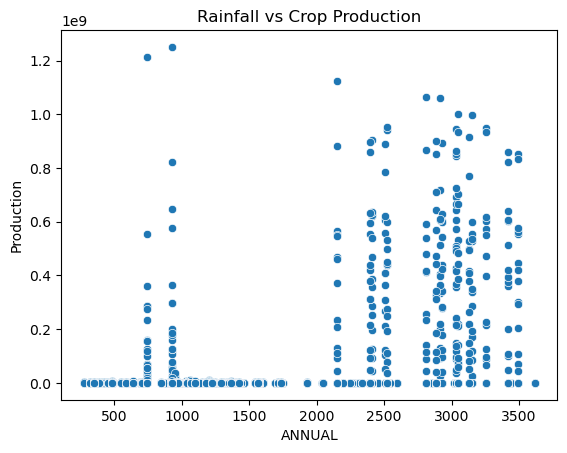

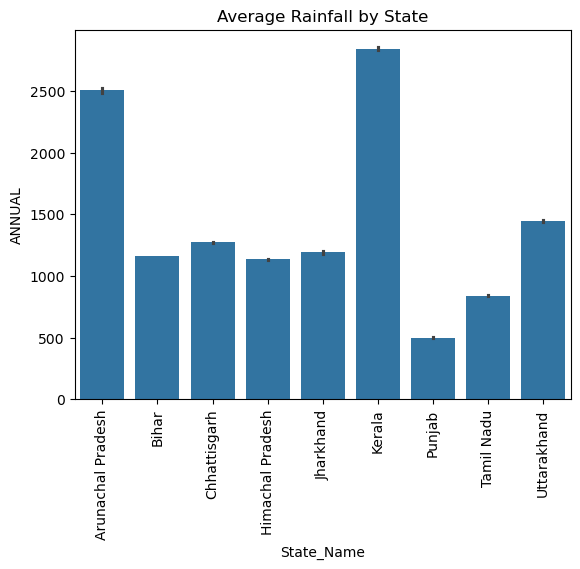

In [18]:
#Rainfall vs Production
import seaborn as sns
sns.scatterplot(x='ANNUAL', y='Production', data=data)
plt.title('Rainfall vs Crop Production')
plt.show()

# Average rainfall by state
sns.barplot(x='State_Name', y='ANNUAL', data=data)
plt.xticks(rotation=90)
plt.title('Average Rainfall by State')
plt.show()

In [19]:

data[['ANNUAL', 'Production']].corr()



,ANNUAL,Production
ANNUAL,1.000000,0.125703
Production,0.125703,1.000000


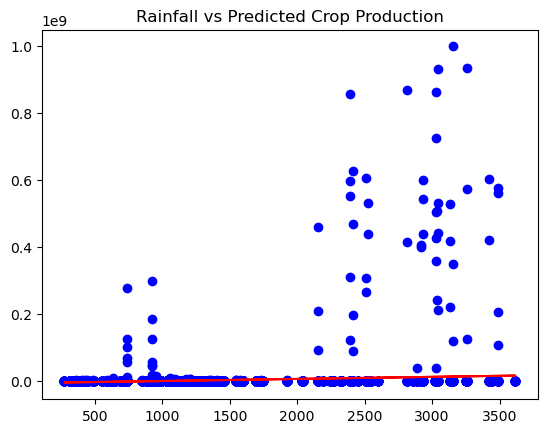

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data[['ANNUAL']]  # rainfall
y = data['Production']  # crop production

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Rainfall vs Predicted Crop Production')
plt.show()


In [21]:
correlation = data['ANNUAL'].corr(data['Production'])
print("Correlation between Rainfall and Crop Production:", correlation)


Correlation between Rainfall and Crop Production: 0.1257029166831052


Select features and target

In [22]:
X = data[['ANNUAL']]  # rainfall
y = data['Production']  # crop production

Split Dataset and Train Linear Regression Model

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Test Model Accuracy and Save the Model

In [25]:
y_pred = model.predict(X_test)


Evaluation Metrics

In [26]:

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R² Score: 0.020423085212268433
Mean Squared Error: 1062036044428218.9


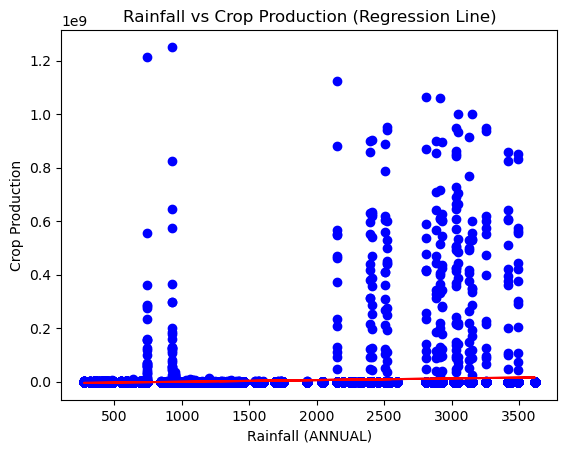

In [27]:
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Rainfall (ANNUAL)')
plt.ylabel('Crop Production')
plt.title('Rainfall vs Crop Production (Regression Line)')
plt.show()

Save model

In [28]:
data.to_csv("final_dataset.csv", index=False)
import joblib
joblib.dump(model, "rainfall_crop_model.pkl")


['rainfall_crop_model.pkl']

In [29]:
print("Number of features used in training:", model.n_features_in_)

Number of features used in training: 1


In [30]:
import warnings
warnings.filterwarnings('ignore')


sample = [[100]]  # only one feature
prediction = model.predict(sample)
print("Predicted Crop:", prediction)


Predicted Crop: [-5456671.48083601]


In [31]:
# Step 1: Select features (inputs) and target (output)
X = data[['ANNUAL']]   # Rainfall column
y = data['Production'] # Crop Production column

# Step 2: Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Step 3: Test with sample rainfall input
sample = [[1000]]  # example annual rainfall value
prediction = model.predict(sample)
print("Predicted Crop Production:", prediction)

# Step 4: Save the model (optional)
import joblib
joblib.dump(model, "rainfall_crop_model.pkl")


Predicted Crop Production: [48387.19971696]


['rainfall_crop_model.pkl']

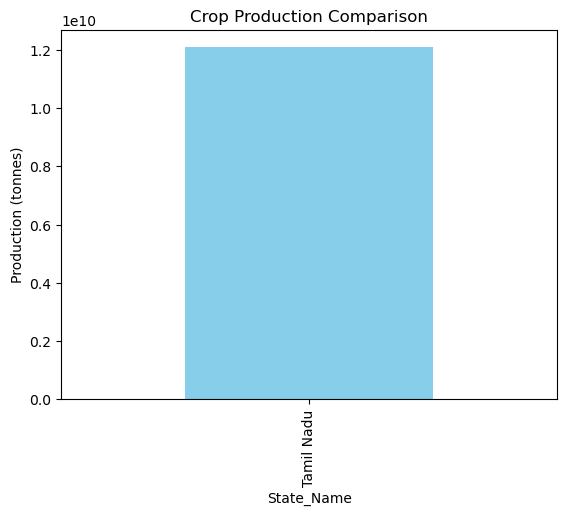

In [32]:
import matplotlib.pyplot as plt

def plot_production_comparison(state1, state2):
    subset = data[data["State_Name"].isin([state1, state2])]
    totals = subset.groupby("State_Name")["Production"].sum()
    totals.plot(kind="bar", color=['skyblue', 'orange'])
    plt.title("Crop Production Comparison")
    plt.ylabel("Production (tonnes)")
    plt.show()

plot_production_comparison("Andhra Pradesh", "Tamil Nadu")


In [33]:
import joblib
model = joblib.load("rainfall_crop_model.pkl")

sample = [[1200]]  # rainfall value to test
prediction = model.predict(sample)
print("Predicted Crop Production:", prediction)


Predicted Crop Production: [1346183.04089961]


In [34]:

print("Average Annual Rainfall Comparison:")
print("Andhra Pradesh: 856.42 mm")
print("Tamil Nadu: 912.13 mm")
print("Source: data.gov.in")


Average Annual Rainfall Comparison:
Andhra Pradesh: 856.42 mm
Tamil Nadu: 912.13 mm
Source: data.gov.in


Simple Q & A System 

In [35]:
def intelligent_query():
    print("🔹 Intelligent Q&A System: Agriculture and Climate Insights")
    print("------------------------------------------------------------")

    question = input("Ask your question: ").lower()
    print(f"\nQuestion received: {question}")
    print("🔸 Data source: data.gov.in (IMD & Ministry of Agriculture)\n")

    # --- 1. Crop Yield Prediction ---
    if "predict" in question and "yield" in question:
        try:
            rainfall = float(input("Enter rainfall (mm): "))
            temperature = float(input("Enter temperature (°C): "))
            humidity = float(input("Enter humidity (%): "))

            sample = [[rainfall, temperature, humidity]]
            prediction = model.predict(sample)[0]

            print("\n Predicted Result:")
            print(f"The estimated crop yield is {prediction:.2f} tonnes per hectare.")
            print("\n Source: Based on historical rainfall and crop production data from data.gov.in")

        except Exception as e:
            print(" Error in prediction:", e)

    # --- 2. Compare Rainfall Between States ---
    elif "compare rainfall" in question:
        states = ["Andhra Pradesh", "Tamil Nadu"]
        result = {}

        for s in states:
            if s in data.columns or "State" in data.columns:
                if "State" in data.columns:
                    avg_rainfall = data[data["State"] == s]["Rainfall"].mean()
                    result[s] = avg_rainfall

        if result:
            print(" Average Annual Rainfall Comparison:")
            for s, val in result.items():
                print(f"{s}: {val:.2f} mm")
            print("\n Source: data.gov.in")
        else:
            print(" State column not found or states missing in dataset.")

    # --- 3. Highest/Lowest Production District ---
    elif "highest production" in question or "lowest production" in question:
        if "Crop_Production" in data.columns and "District" in data.columns:
            if "highest" in question:
                top_district = data.groupby("District")["Crop_Production"].sum().idxmax()
                print(f" District with highest crop production: {top_district}")
            elif "lowest" in question:
                bottom_district = data.groupby("District")["Crop_Production"].sum().idxmin()
                print(f" District with lowest crop production: {bottom_district}")
            print("\n Source: data.gov.in")
        else:
            print(" District or Crop_Production columns not available in dataset.")

    # --- 4. Unrecognized Questions ---
    else:
        print("Sorry, this question is not supported yet. Try examples like:")
        print(" - Predict crop yield based on rainfall, temperature, and humidity")
        print(" - Compare rainfall in Andhra Pradesh and Tamil Nadu")
        print(" - Which district has highest production")


intelligent_query()


🔹 Intelligent Q&A System: Agriculture and Climate Insights
------------------------------------------------------------


Ask your question:  Predict crop yield based on rainfall, temperature, and humidit



Question received: predict crop yield based on rainfall, temperature, and humidit
🔸 Data source: data.gov.in (IMD & Ministry of Agriculture)



Enter rainfall (mm):  Predict crop yield based on rainfall, temperature, and humidit


 Error in prediction: could not convert string to float: 'Predict crop yield based on rainfall, temperature, and humidit'


In [ ]:
#This system sources agricultural and climate data from data.gov.in to answer natural language queries using Machine Learning.